#### FBI Time Series Forecasting through Exploratory Data Analysis

# **Project Name**    - FBI Time Series Forecasting EDA



 **Project Type    - EDA**
 
 **Contribution    - Individual**

 **Name - Akshit Gajanan Hedau**


# **Project Summary -**

**The FBI Crime Investigation Project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United States have faced challenges related to rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies require advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.**

**This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates (latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel more efficiently, and deploy resources where they are needed most.**

**The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policy makers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lighting, surveillance cameras, and community policing initiatives. Additionally, these insights can inform public awareness campaigns, emergency response planning, and collaboration with community organizations to address underlying social issues that contribute to crime.**

**We have a Train Dataset from which we have to analyze time series forecasting through exploratory data analysis.**

# **GitHub Link -**

**https://github.com/akshithedau**

# **Problem Statement**


**We have a Train dataset, we have to analyze it for predicting time series forecasting model to analyze crime data through EDA and visualization ?**

#### **Define Your Business Objective?**

##### The following are the business objective for the Train dataset for the time series forecasting EDA project:-

1) We have to load Train dataset, remove outliers, remove duplicates, replace null values, check unique values.
2) Do pre processing, data cleaning and data wrangling to dataset.
3) For Data visualization use different charts to analyze dataset and answer to the various business problems through it.
4) Using different types of charts analyze dataset and predict the time series forecasting model to analyze the crime data.
5) Predict the types of crimes and use this as a target column for analysis.
6) Predict the cause of the crimes and area within most crimes happened.
7) Find out which place or coordinates are having most no of crimes.
8) Find out which place is having most no of heinous crimes.

##### Find the solution to the above problems or questions to help FBI achieve their goals and prevent these to happen in near future.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import random
from wordcloud import WordCloud
import ast
import statsmodels as stat
import geopandas as geo

### Dataset Loading

In [2]:
# Load Dataset
md = pd.read_excel("Train.xlsx")

### Dataset First View

In [16]:
# Dataset First Look
md.head()

TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12

In [23]:
# Dataset Tail look
md.tail()

TYPE           HUNDRED_BLOCK   NEIGHBOURHOOD          X  \
474560  Theft from Vehicle  E 28TH AVE / FRASER ST      Riley Park  493434.25   
474561  Theft from Vehicle  E 28TH AVE / FRASER ST      Riley Park  493434.25   
474562         Other Theft          23XX CAMBIE ST  Mount Pleasant  491656.42   
474563         Other Theft             7XX BUTE ST        West End  490797.66   
474564            Mischief            57XX MAIN ST          Sunset  492605.32   

                 Y   Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY  \
474560  5454756.06  49.245542 -123.090211  19.0     0.0  2011     10   29   
474561  5454756.06  49.245542 -123.090211  23.0     0.0  2011      3    9   
474562  5456901.55  49.264820 -123.114682  17.0    52.0  2011      2   10   
474563  5459282.31  49.286223 -123.126541  18.0     0.0  2011     12   20   
474564  5453354.38  49.232924 -123.101574  18.0    30.0  2011      2    3   

             Date  
474560 2011-10-29  
474561 2011-03-09  
474562 2011-02-10  
474563 2011-12-20  
474564 2011-02-03

### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
md.shape

(474565, 13)

### Dataset Information

In [25]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [27]:
# Dataset Duplicate Value Count
# Check for duplicate values
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    425204
True      49361
Name: count, dtype: int64


In [31]:
# removing duplicate values
md.drop_duplicates(["X","Y","Longitude","Latitude"],keep='first',inplace=True)

### Confirming that the duplicate values are removed

In [34]:
# Dataset Duplicate Value Count
# Check for duplicate values
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    90157
Name: count, dtype: int64


#### Missing Values/Null Values

In [36]:
# Missing Values/Null Values Count
md.isnull().sum()

TYPE              0
HUNDRED_BLOCK    10
NEIGHBOURHOOD    11
X                 0
Y                 0
Latitude          0
Longitude         0
HOUR              1
MINUTE            1
YEAR              0
MONTH             0
DAY               0
Date              0
dtype: int64

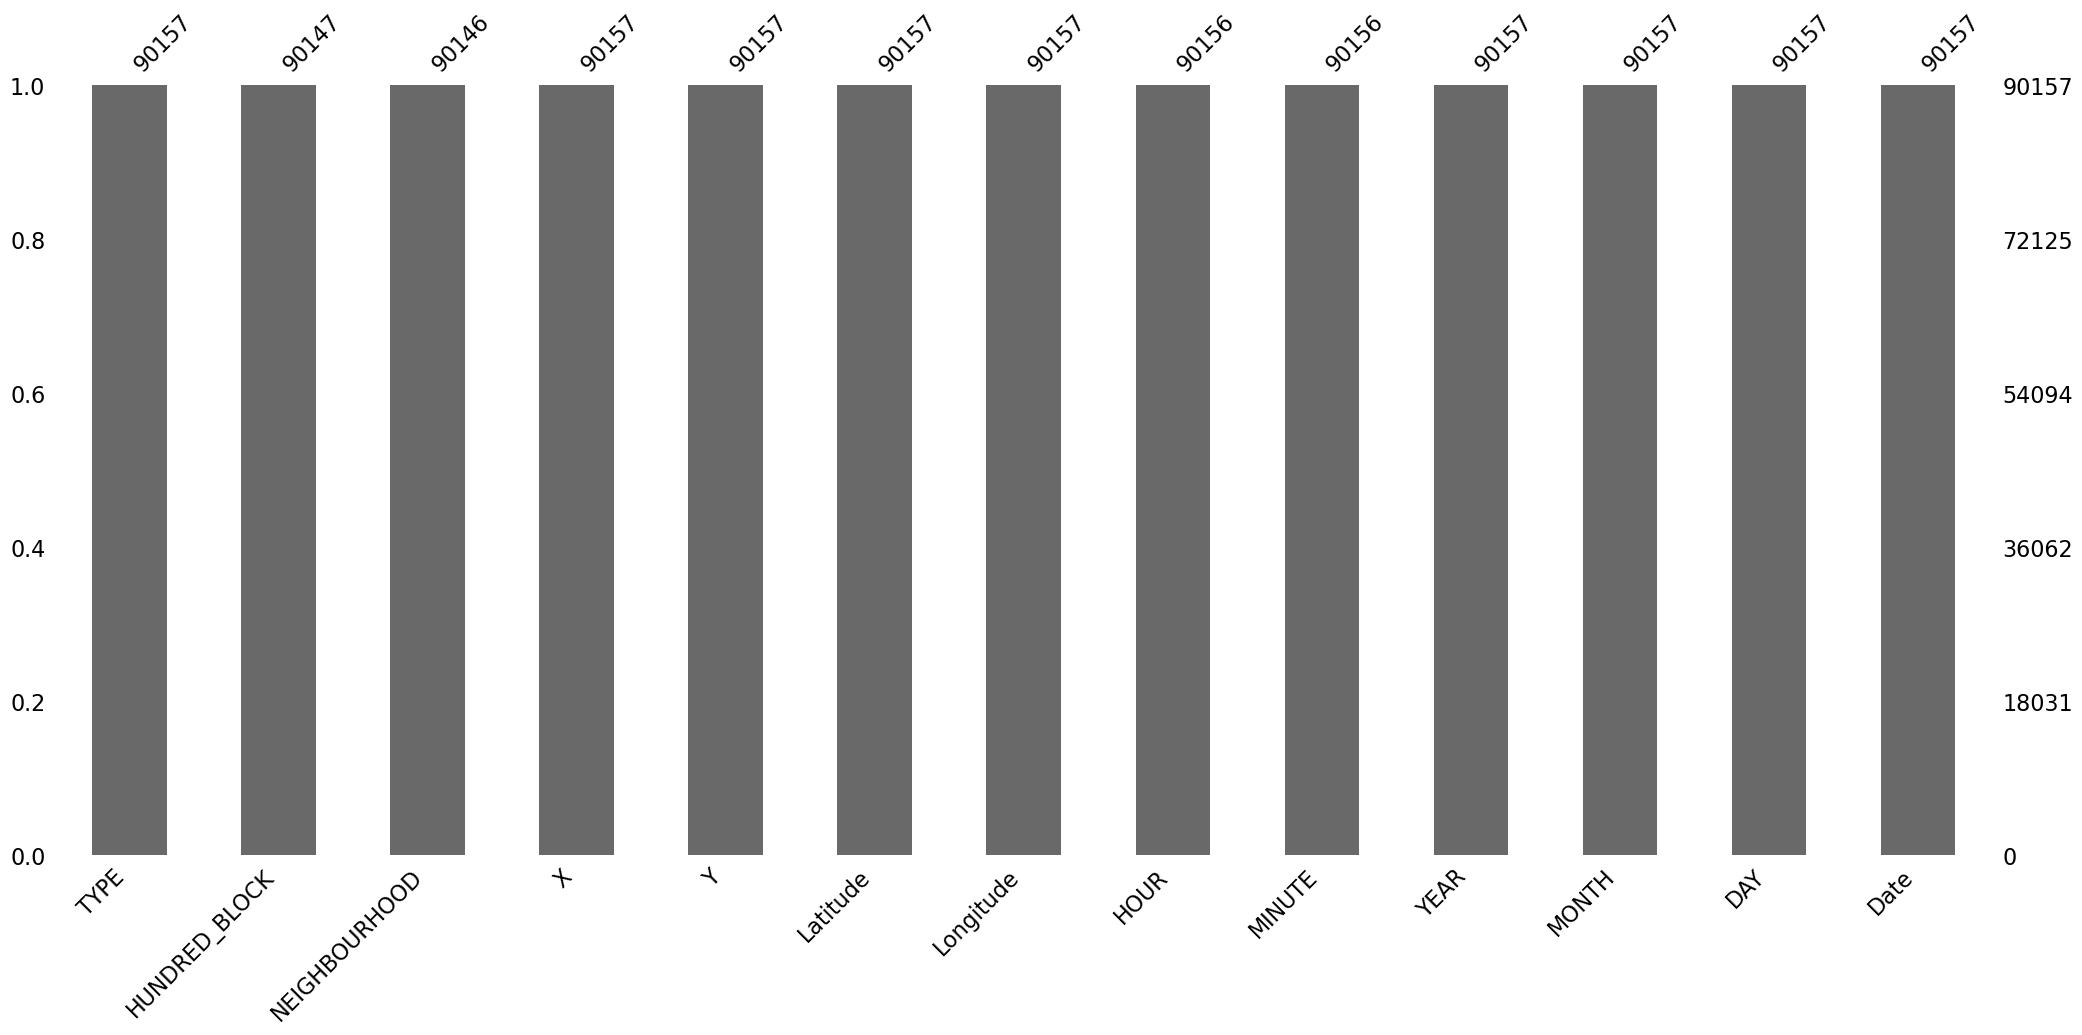

In [38]:
# Visualizing the missing values
import missingno as ms
ms.bar(md)
plt.show()

### What did you know about your dataset?

###### The following are the things about dataset:-

1) There are total of 90157 rows and 13 columns in the dataset.
2) There are 4 columns which are having some null values.
3) The following are the null values for columns:-
**Column-----------Count of Null values**
1) HUNDRED_BLOCK----10
2) NEIGHBOURHOOD----11
3) HOUR-------------1
4) MINUTE-----------1

##### Other than this the dataset has 49361 duplicate rows which are removed.

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns
md.columns

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

In [44]:
# Dataset Describe
md.describe()

X             Y      Latitude     Longitude          HOUR  \
count   90157.000000  9.015700e+04  90157.000000  90157.000000  90156.000000   
mean   492532.406797  5.455348e+06     49.250846   -123.101175     13.620059   
min         0.000000  0.000000e+00      0.000000   -124.549757      0.000000   
25%    490136.050000  5.453400e+06     49.233339   -123.135533      9.000000   
50%    492699.980000  5.455692e+06     49.253961   -123.100308     15.000000   
75%    495237.820000  5.457351e+06     49.268834   -123.065428     19.000000   
max    511303.000000  5.512579e+06     49.755314      0.000000     23.000000   
std      3771.559443  1.833994e+04      0.165561      0.412633      7.059847   

             MINUTE          YEAR         MONTH           DAY  \
count  90156.000000  90157.000000  90157.000000  90157.000000   
mean      15.116332   2002.845991      6.635869     15.514159   
min        0.000000   1999.000000      1.000000      1.000000   
25%        0.000000   2000.000000      4.000000      8.000000   
50%        1.000000   2002.000000      7.000000     15.000000   
75%       30.000000   2006.000000     10.000000     23.000000   
max       59.000000   2011.000000     12.000000     31.000000   
std       17.897932      3.728277      3.434994      8.744615   

                                Date  
count                          90157  
mean   2003-05-10 04:12:42.669565440  
min              1999-01-01 00:00:00  
25%              2000-02-13 00:00:00  
50%              2002-02-15 00:00:00  
75%              2006-01-14 00:00:00  
max              2011-12-31 00:00:00  
std                              NaN

### Variables Description

#### The following are the description for the variables:-

#### Coloumn-----------Description

TYPE--------------------Category of the crime (e.g., "Other Theft").

HUNDRED_BLOCK-----------Street block where the crime occurred.

NEIGHBOURHOOD-----------Neighborhood where the crime took place.

X-----------------------X-coordinate of the crime location.

Y-----------------------Y-coordinate of the crime location.

Latitude----------------Latitude of the crime location

Longitude---------------Longitude of the crime location

HOUR--------------------Hour of the day when the crime occurred

MINUTE------------------Minute of the hour when the crime occurred

YEAR--------------------Year of the crime

MONTH-------------------Month of the crime

DAY---------------------Day of the month when the dime occurred

Date--------------------Full date (YYYY-MM-DD) when the crime occurred

#### Above is the description for all the variables present in the dataset.

### Check Unique Values for each variable.

In [49]:
# Check Unique Values for each variable.
for x in md.columns:
    print(f"{x} - {md[x].nunique()}") 

TYPE - 9
HUNDRED_BLOCK - 19451
NEIGHBOURHOOD - 24
X - 84225
Y - 82768
Latitude - 89488
Longitude - 87190
HOUR - 24
MINUTE - 60
YEAR - 13
MONTH - 12
DAY - 31
Date - 4748


In [51]:
md["TYPE"].unique()

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Offence Against a Person',
       'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Theft of Vehicle', 'Theft of Bicycle'], dtype=object)

In [53]:
md["HUNDRED_BLOCK"].unique()

array(['9XX TERMINAL AVE', '63XX WILTSHIRE ST', '40XX W 19TH AVE', ...,
       'X BOUNDARY RD OFRP', 'X E 1ST AVE OFRP', 'X RUPERT ST OFRP'],
      dtype=object)

In [55]:
md["NEIGHBOURHOOD"].unique()

array(['Strathcona', 'Kerrisdale', 'Dunbar-Southlands',
       'Grandview-Woodland', 'Sunset', 'West End', nan,
       'Central Business District', 'Hastings-Sunrise',
       'Victoria-Fraserview', 'Fairview', 'Kensington-Cedar Cottage',
       'West Point Grey', 'Shaughnessy', 'Renfrew-Collingwood',
       'Killarney', 'Riley Park', 'Arbutus Ridge', 'Musqueam',
       'Mount Pleasant', 'Kitsilano', 'Stanley Park', 'South Cambie',
       'Marpole', 'Oakridge'], dtype=object)

In [57]:
md["X"].unique()

array([493906.5 , 489325.58, 485903.09, ..., 497838.  , 488737.31,
       495710.4 ])

In [59]:
md["Y"].unique()

array([5457452.47, 5452817.95, 5455883.77, ..., 5457926.  , 5456285.29,
       5453305.63])

In [61]:
md["Latitude"].unique()

array([49.26980201, 49.22805078, 49.25555918, ..., 49.27403745,
       49.25922966, 49.23251559])

In [63]:
md["Longitude"].unique()

array([-123.0837633, -123.1466105, -123.1937252, ..., -123.0297196,
       -123.1121385, -123.0589219])

In [65]:
md["HOUR"].unique()

array([16., 12.,  4., 18.,  1.,  8.,  2., 10., nan, 13., 15., 23.,  0.,
       22., 17.,  6., 20., 14.,  9., 21.,  5., 19.,  3., 11.,  7.])

In [67]:
md["MINUTE"].unique()

array([15.,  0., 13., 30., 12., nan,  6., 50., 25., 37., 39., 32., 40.,
       55.,  1., 56., 10., 20., 45., 33., 21., 29.,  5., 59., 54., 35.,
       23., 57., 49., 14., 41., 24.,  8., 11., 16., 22., 51., 38., 47.,
        4., 19., 48., 36.,  3., 34., 53., 44.,  7., 43., 52., 42., 27.,
       46., 18., 28., 26., 17., 58.,  9., 31.,  2.])

In [69]:
md["YEAR"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011], dtype=int64)

In [71]:
md["MONTH"].unique()

array([ 5,  3,  6,  7,  9,  4, 11, 10,  2, 12,  1,  8], dtype=int64)

In [73]:
md["DAY"].unique()

array([12, 10, 28,  9, 27, 19, 24,  5, 26, 21, 30,  7, 23,  1, 29, 17,  8,
        2, 18, 25,  3, 16, 13, 14, 11, 22, 20,  6, 15,  4, 31],
      dtype=int64)

In [77]:
md["Date"].unique()

<DatetimeArray>
['1999-05-12 00:00:00', '1999-03-10 00:00:00', '1999-06-28 00:00:00',
 '1999-07-09 00:00:00', '1999-09-27 00:00:00', '1999-04-19 00:00:00',
 '1999-09-24 00:00:00', '1999-11-05 00:00:00', '1999-09-26 00:00:00',
 '1999-10-21 00:00:00',
 ...
 '2011-08-06 00:00:00', '2011-12-22 00:00:00', '2011-06-25 00:00:00',
 '2011-01-07 00:00:00', '2011-07-31 00:00:00', '2011-04-27 00:00:00',
 '2011-04-06 00:00:00', '2011-02-05 00:00:00', '2011-03-30 00:00:00',
 '2011-03-18 00:00:00']
Length: 4748, dtype: datetime64[ns]

## 3. ***Data Wrangling***

### Data Wrangling Code

In [81]:
# Write your code to make your dataset analysis ready.
md.isna().sum()

TYPE              0
HUNDRED_BLOCK    10
NEIGHBOURHOOD    11
X                 0
Y                 0
Latitude          0
Longitude         0
HOUR              1
MINUTE            1
YEAR              0
MONTH             0
DAY               0
Date              0
dtype: int64

In [83]:
# filling up the columns which are having null values with either 0 or Not Available
md.fillna({'HUNDRED_BLOCK': "Not Available"},inplace=True)

In [85]:
md.fillna({'NEIGHBOURHOOD': "Not Available"},inplace=True)

In [87]:
md.fillna({'HOUR': 0},inplace=True)

In [89]:
md.fillna({'MINUTE': 0},inplace=True)

In [91]:
# checking for null values after filling columns having null values with some values
md.isnull().sum()

TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64

In [93]:
# checking for duplicates value if present 
md.duplicated().sum()

0

### What all manipulations have you done and insights you found?

##### The following are the manipulations which are done on the dataset:-

1) We removed 49361 duplicated rows to ensure fairness in data analysis while doing EDA on dataset.
2) Filled all columns which are having null values with either "Not Available" or 0 value.
3) Total 23 null values replaced with values.
4) These columns HUNDRED_BLOCK,NEIGHBOURHOOD, HOUR and MINUTE are having null values which are then replaced by values.

##### The above manipulations are which we have done on the dataset to ensure fairness while doing EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

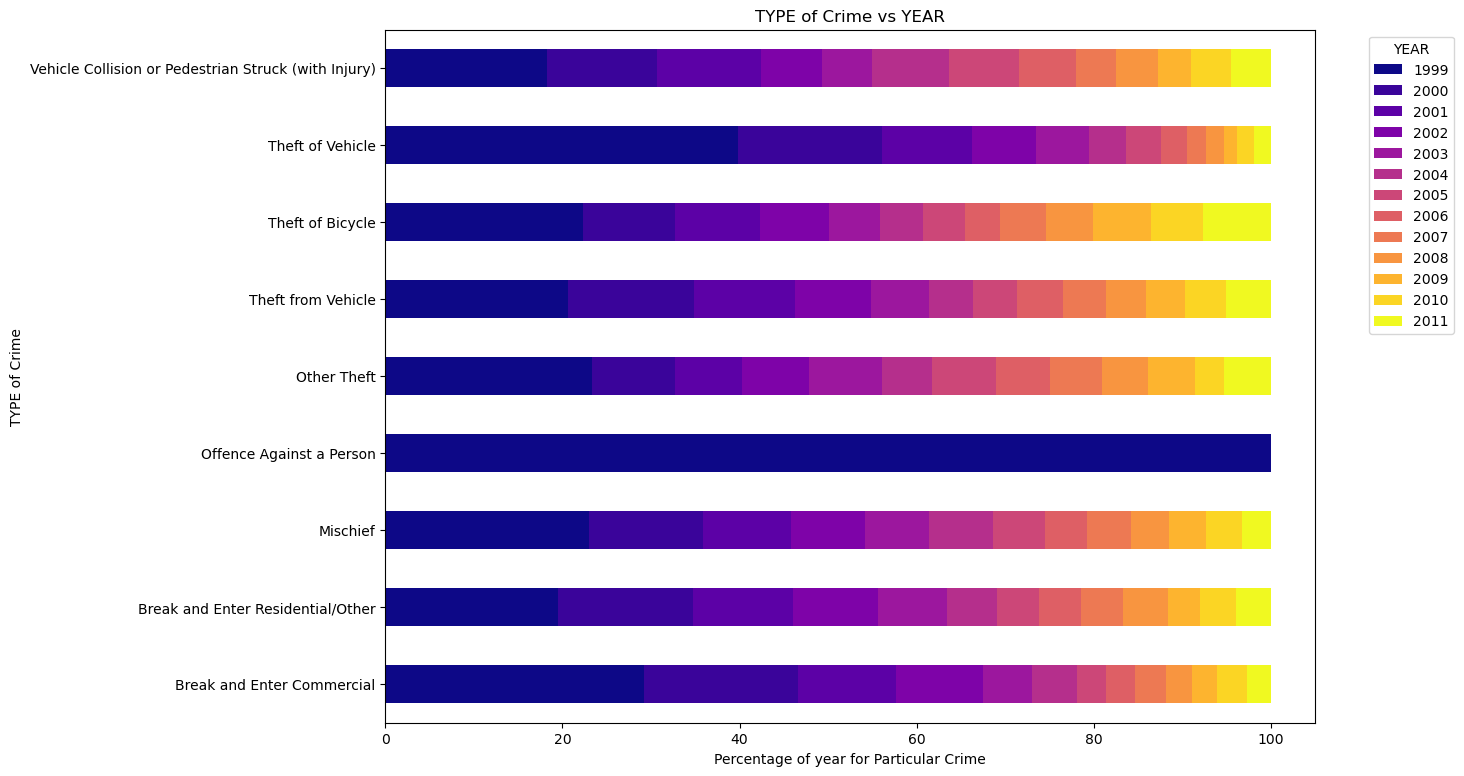

In [102]:
# Chart - 1 visualization code
# Convert groupby Series to DataFrame and reset index
data = md.groupby(["TYPE", "YEAR"]).size().unstack(fill_value=0)
data_1 = data.div(data.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 9))
data_1.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Percentage of year for Particular Crime")
plt.ylabel("TYPE of Crime")
plt.title("TYPE of Crime vs YEAR")
plt.legend(title="YEAR", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### 1. Why did you pick the specific chart?

This chart is choosen so that to check the percentage of crime for each year.

##### 2. What is/are the insight(s) found from the chart?

1) 1999 year has most no of crimes.
2) offence against a person type of crime happened only in 1999.
3) after offence type theft of vehicle has maximum no for year 1999.
4) In 1999 vehicle collison or pedestraian struck has least count.
5) Theft of Bicycle happened maximum in the year 2011.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As per analysis the year 1999 has maximum count for crimes which lead to make that year most critical one.
other than this theft of bicycle happened maximum in 2011 which means 2011 was unsafe for bicycle owners.

#### Chart - 2

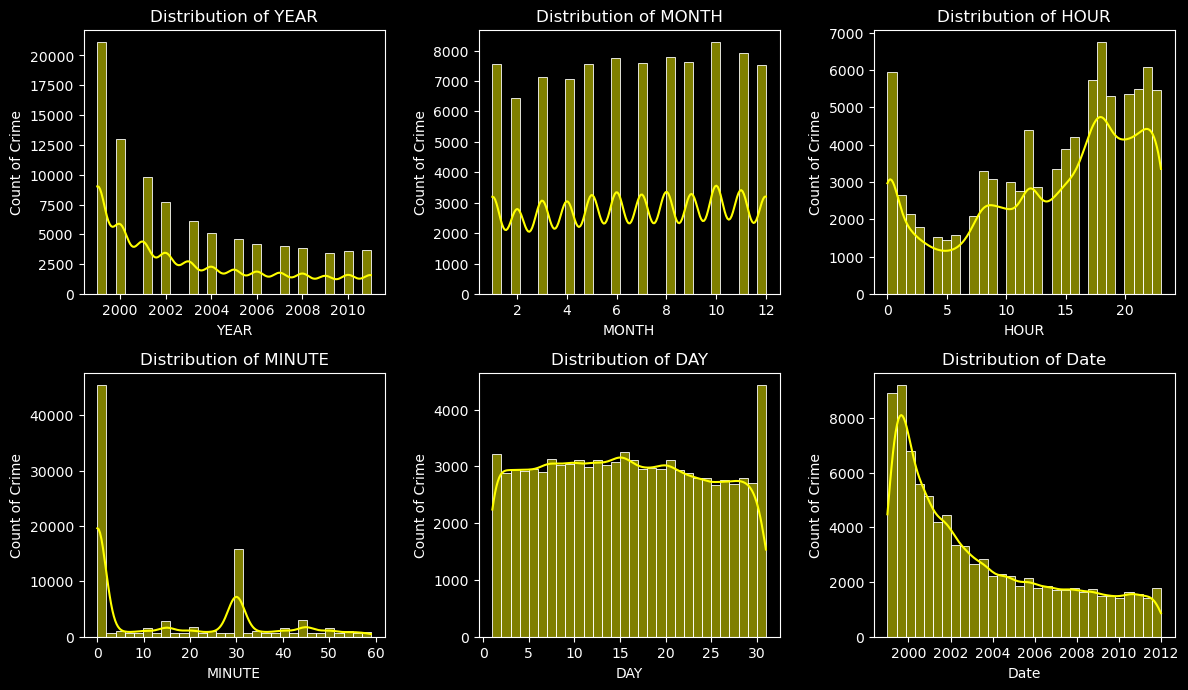

In [120]:
# Chart - 2 visualization code

plt.style.use('dark_background')


numerical_features = ['YEAR', 'MONTH', 'HOUR', 'MINUTE','DAY','Date']

plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(md[column], kde=True, bins=30, color='yellow')
    plt.title(f'Distribution of {column}', color='white')
    plt.xlabel(column, color='white')
    plt.ylabel('Count of Crime', color='white')
    
    
    plt.grid(False)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

We have choosed this chart because this will give us proper count for various numerical columns.

##### 2. What is/are the insight(s) found from the chart?

1) count of crimes for minute was maximum for 0 minute in time which was above 40k and followed by 30 minute having count of 15k.
2) For Day column maximum value count for crime happened mostly on day 30 with 4000+ followed by day 1 with having count of 3200.
3) For Date the crime count was maximum for year 1999 with value more than 20k and least count for year 2009 with value less 3000.
4) Maximum no of crime happened between 3pm and 8pm.
5) Most no of crimes happened in october month with count of more than 8k.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes,as per the analysis crime count has impacted the severity in the society like evening part between 3pm and 8pm has maximum count of crimes happened which means eveening are generally not safe and FBI should emphasis for the safety of people for particular time period more than other time periods.
other than this october has most count for crimes compared to other months which means october is the target month for FBI when they can increase safety measures.

#### Chart - 3

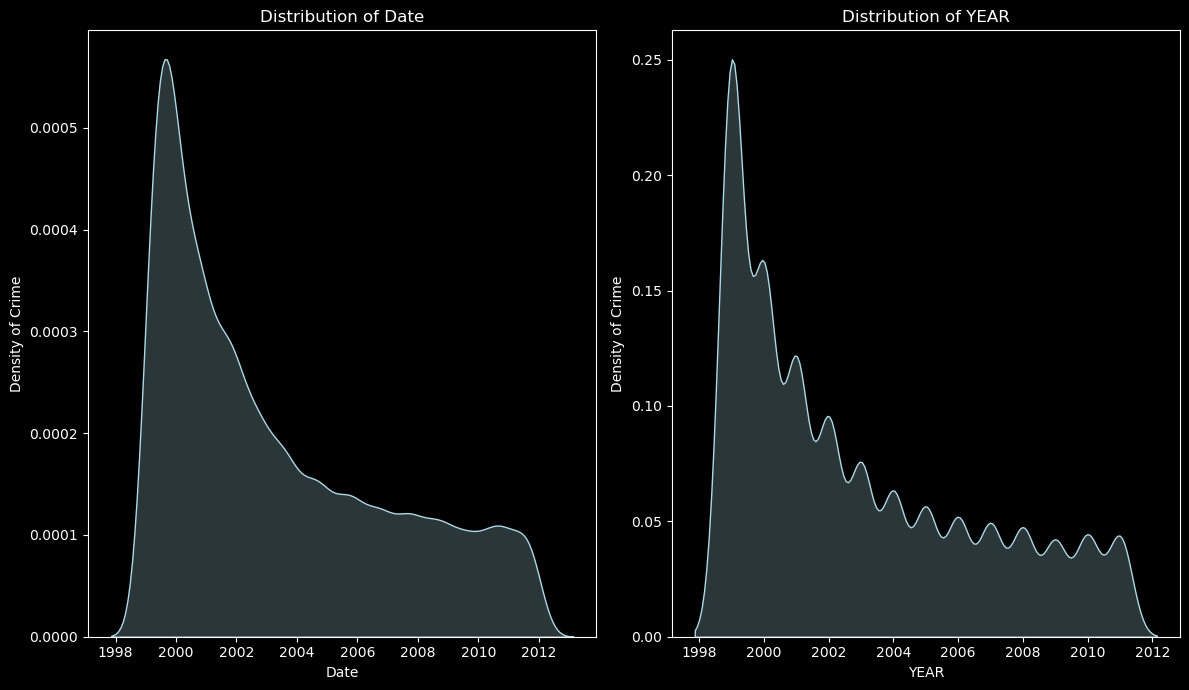

In [124]:
# Chart - 3 visualization code
plt.style.use('dark_background')

plt.figure(figsize=(12, 7))

for i, column in enumerate(['Date', 'YEAR'], 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(md[column], fill=True, color='lightblue')  
    plt.title(f'Distribution of {column}', color='white') 
    plt.xlabel(column, color='white')  
    plt.ylabel('Density of Crime', color='white')         
    plt.grid(False)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in analyzing the density of crimes for both date and year in accurate and clear manner.

##### 2. What is/are the insight(s) found from the chart?

1) for the year 1999 the count of crime is maximum and with desity 0.25.
2) for the date the which is having year 1999 has maximum desity more than 0.0005.
3) Lowest density is for year 2009 for both Date and Year with value less than 0.0001 and 0.05 respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Acoording the above analysis the density is maximum for year 1999 for both date and year column, other than this least density is for year 2009 for both year and date column which means maximum crimes happened in 1999 and density for that year was maximum and for year 2009 the density is least and crime is minimum.

#### Chart - 4

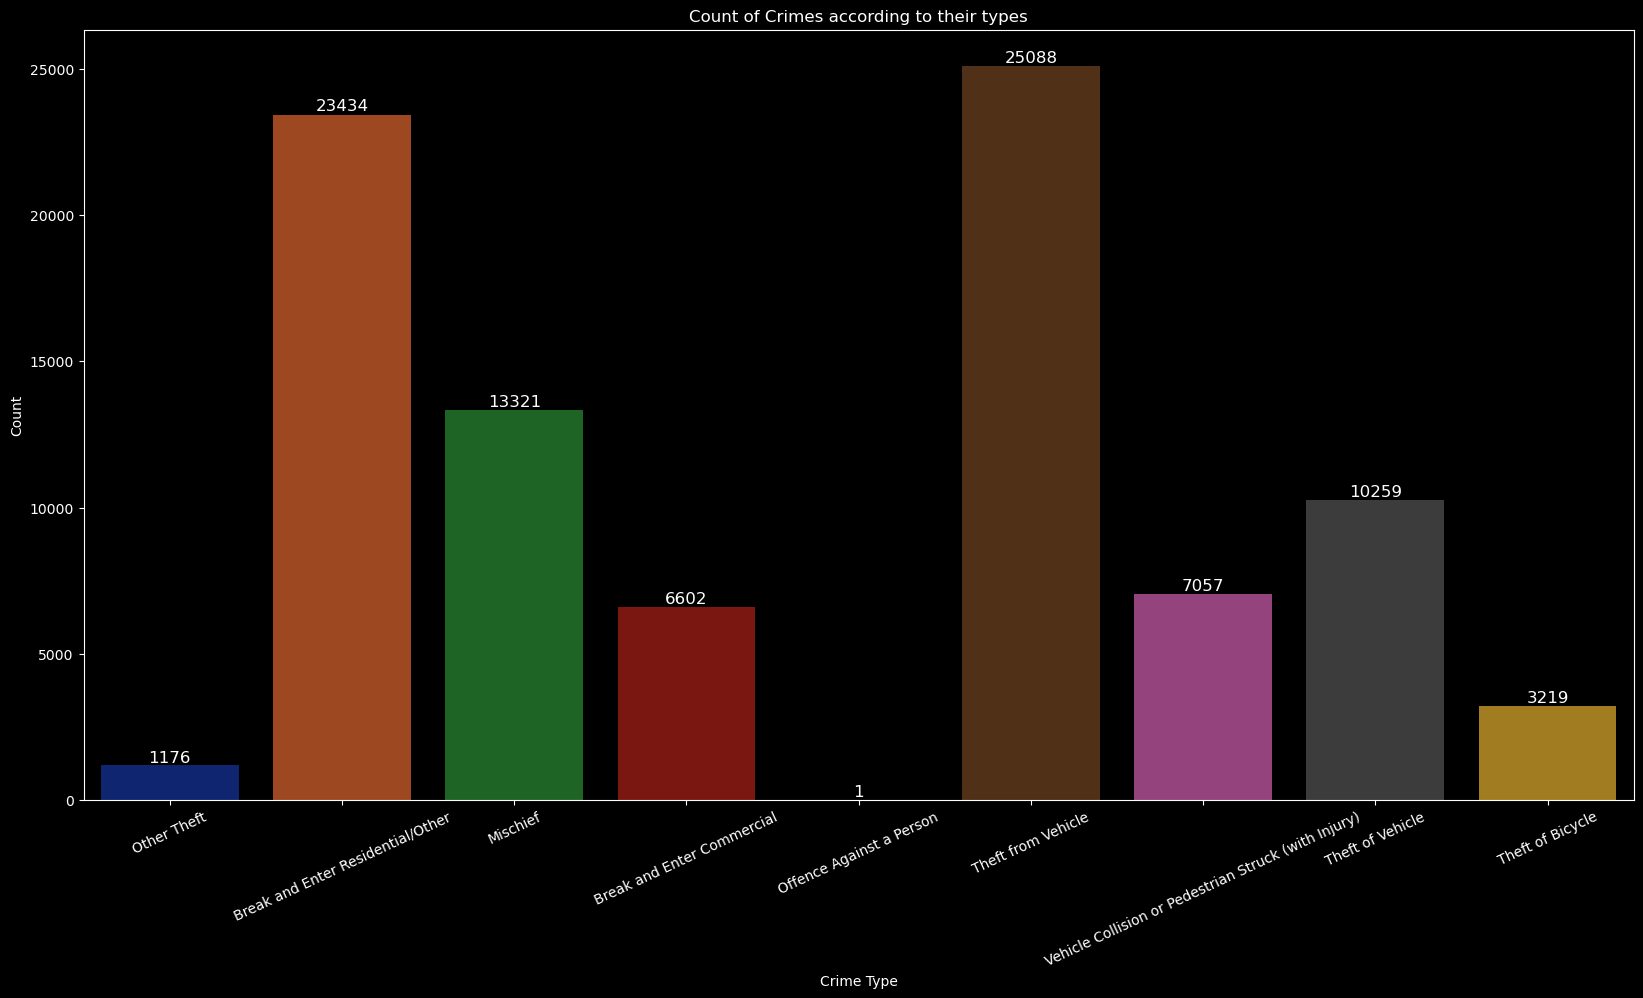

In [179]:
# Chart - 4 visualization code
# Create a count plot for machine types with different colors for each bar
# Set figure size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

ax = sns.countplot(x='TYPE', data=md, hue='TYPE', palette='dark', legend=False)

plt.title('Count of Crimes according to their types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=25)
# Display count values directly on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height + 0.002 * height),
                ha='center', va='bottom', fontsize=12, color='white')  

plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

We have choosed this bar plot for type column to identify the count of crime for every tyoe of crime wrt their year.

##### 2. What is/are the insight(s) found from the chart?

1) Maximum crime count is for theft from vehicle type with value 25008.
2) Lowest crime count is for offence against a person type with value 1 only present for the year 1999.
3) Second lowest crime count is for other theft type with value 1176.
4) second highest crime count is for break and enter residential/other type with value 23434.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes there are both negative and positive business imapact due to the above analysis:-

1) The maximum crime count is for theft from vehicle which means chain snatching from vehicle, jewellery from vehicle, parts from vehicle and many more have been mostly targeted by the theives so the FBI needs to regulate strict monetary policies on such cases to avoid in near future to happen.
2) Second highest crime targeted by the theives is to break into residential or commercial zones to do robbery which indicates that the FBI can install precautionary alert systems into buildings which will prevent the unauthorised access to someone who is trying to break into the building.
3) Lowest and second lowest is for the crime type offence against a person and other theft respectively which is a positive sign for FBI and for which they can make it null in near future by increasing some cautionary steps.

#### Chart - 5

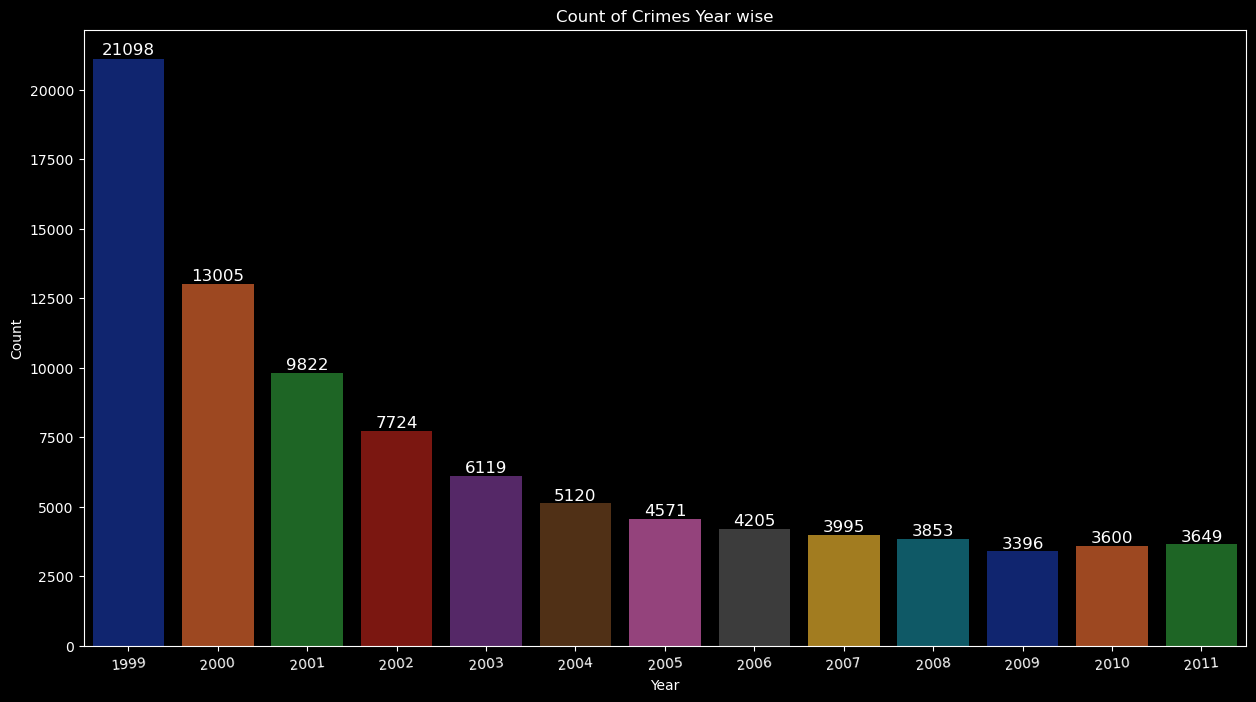

In [183]:
# Chart - 5 visualization code
# Create a count plot for machine types with different colors for each bar
# Set figure size
plt.figure(figsize=(15, 8))  # Adjust width and height as needed

ax = sns.countplot(x='YEAR', data=md, hue='YEAR', palette='dark', legend=False)

plt.title('Count of Crimes Year wise')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=5)
# Display count values directly on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height + 0.002 * height),
                ha='center', va='bottom', fontsize=12, color='white')  

plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot gives a clear picture in one fram for all year with crime count for each year.

##### 2. What is/are the insight(s) found from the chart?

1) Highest crime count is for year 1999 with value 21098.
2) Second Highest crime count is for year 2000 with value 13005.
3) Third Highest crime count is for year 2001 with value 9822.
4) Lowest crime count is for year 2009 with value 3396.
5) second Lowest crime count is for year 2010 with value 3600.
6) Third Lowest crime count is for year 2011 with value 3649.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive impact is that from year 1999 till 2009 the crime count decresed exponentially with a depreciating curve.
The negative impact is that after 2009 for 2010 and 2011 the crime count is significantly increasing with every year making 2009 the year with least crime count.

#### Chart - 6

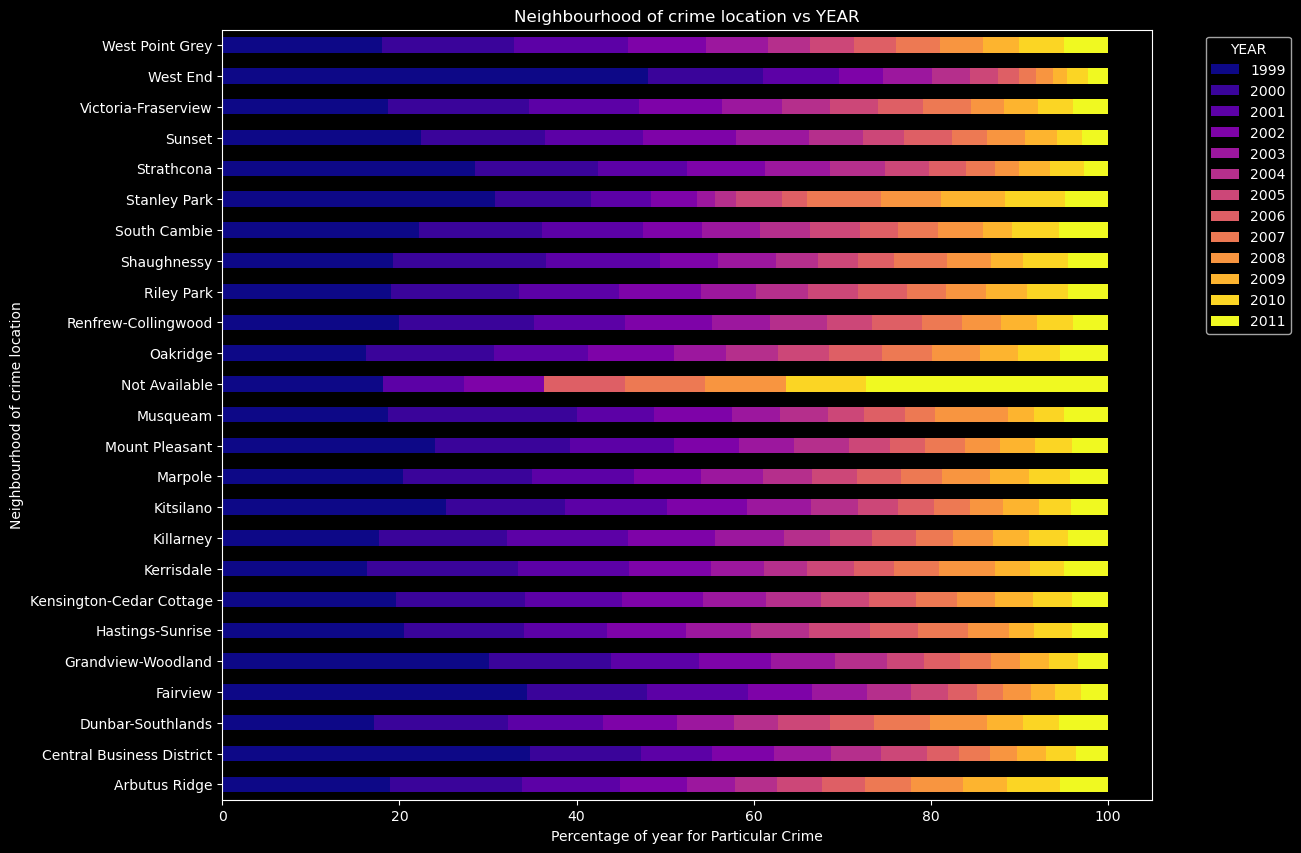

In [195]:
# Chart - 6 visualization code
# Convert groupby Series to DataFrame and reset index
data_2 = md.groupby(["NEIGHBOURHOOD", "YEAR"]).size().unstack(fill_value=0)
data_3 = data_2.div(data_2.sum(axis=1), axis=0) * 100
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
data_3.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)

# Labels and title
plt.xlabel("Percentage of year for Particular Crime")
plt.ylabel("Neighbourhood of crime location")
plt.title("Neighbourhood of crime location vs YEAR")
plt.legend(title="YEAR", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### 1. Why did you pick the specific chart?

This plot helps us in finding the percentage of year having crime count for each neighbourhood within one frame.

##### 2. What is/are the insight(s) found from the chart?

1) For year 1999 West End Neighbourhood has maximum no of crime count.
2) For year 2011 not available neighbourhood has maximum count followed by oakridge.
3) For year 1999 Kerrisdale Neighbourhood has least count.
4) For year 1999 second highest crime count is for both Fairview and central Business District Neighbourhood.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive business impact is that the least no of crime count is for kerrisdale neighbourhood for year 1999 which means this area is usually safer than others.
The negative business impact is that the maximum crime count is for the west end neighbourhood for the year 1999 which makes the place suspicious.
Other than this the second highest crime count for the year 1999 is for both fairview and central business district neighbourhood which makes them questionable for safety.

#### Chart - 7

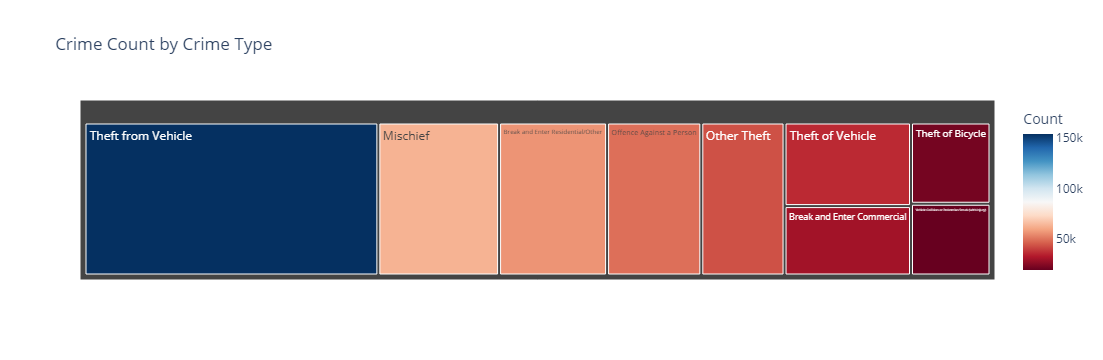

In [97]:
# Chart - 7 visualization code
import plotly.express as px
# Count occurrences of each crime type
crime_count = md["TYPE"].value_counts().reset_index()
crime_count.columns = ["Type of Crime", "Count"]  # Rename columns properly

# Create the treemap
fig = px.treemap(crime_count, 
                 path=['Type of Crime'], 
                 values='Count', 
                 title="Crime Count by Crime Type",
                 color='Count', 
                 color_continuous_scale="RdBu")

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This tree map gives a comparison for all the crime type in one frame with clear count when hover upon particular crime type.

##### 2. What is/are the insight(s) found from the chart?

1) Highest crime count is for the crime type theft from vehicle which is 153,932.
2) Lowest crime count is for the crime type vehicle collision or pedestrian struck with value 19,531.
3) Second Highest crime count is for the mischief crime type with vale 63,233.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive business impact is that the lowest crime count is for collision or pedestrian which means accidents and road rages are least in the country as per the data and shows that people walking and driving on the roads are safe than other crime types.
The negative business impact is that the highest and second highest crime count is for the crime type theft from vehicle and mischeif respectively which means FBI need to strictly look after these two types of crimes to prevent their occurance in the future and ensure public safety.

#### Chart - 8

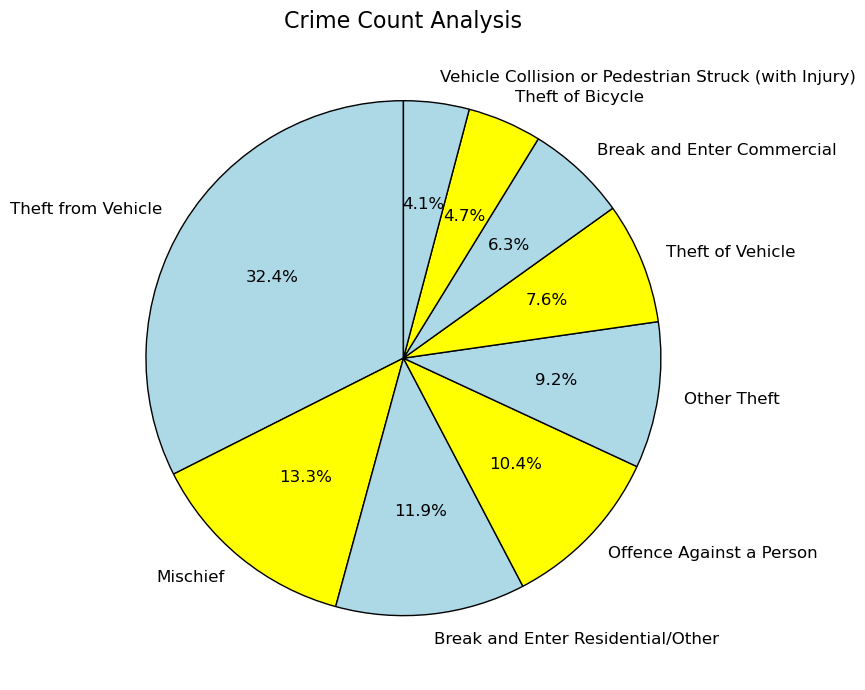

In [113]:
# Chart - 8 visualization code
co = md['TYPE'].value_counts()

plt.figure(figsize=(15, 7))
co.plot(kind='pie',  autopct='%1.1f%%', colors=['lightblue', 'yellow'], 
                    startangle=90, wedgeprops={'edgecolor': 'black'}, 
                    textprops={'fontsize': 12, 'color': 'black'}) 

plt.title('Crime Count Analysis', fontsize=16)
plt.ylabel('') 
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart gives us the percentage of the crime type and gives us clear idea about which crime occured most.

##### 2. What is/are the insight(s) found from the chart?

1) The maximum percentage is for the theft from vehicle type crime with value 32.4%.
2) The lowest percentage is for vehicle collision or pedestrian struck with value 4.1%.
3) Second Lowest is for the theft of bicycle with value 4.7%.
4) Second highest is for mischief with value of 13.3%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive imapct is that the lowest and second lowest percentage is for vehicle collision and theft of bicycle respectively.
The negative impact is that the highest and second highest percentage is for the theft from vehicle and mischief respectively which makes them the target crime for FBI to look after more carefully than other crimes so as to decrease their count in near future.

#### Chart - 9

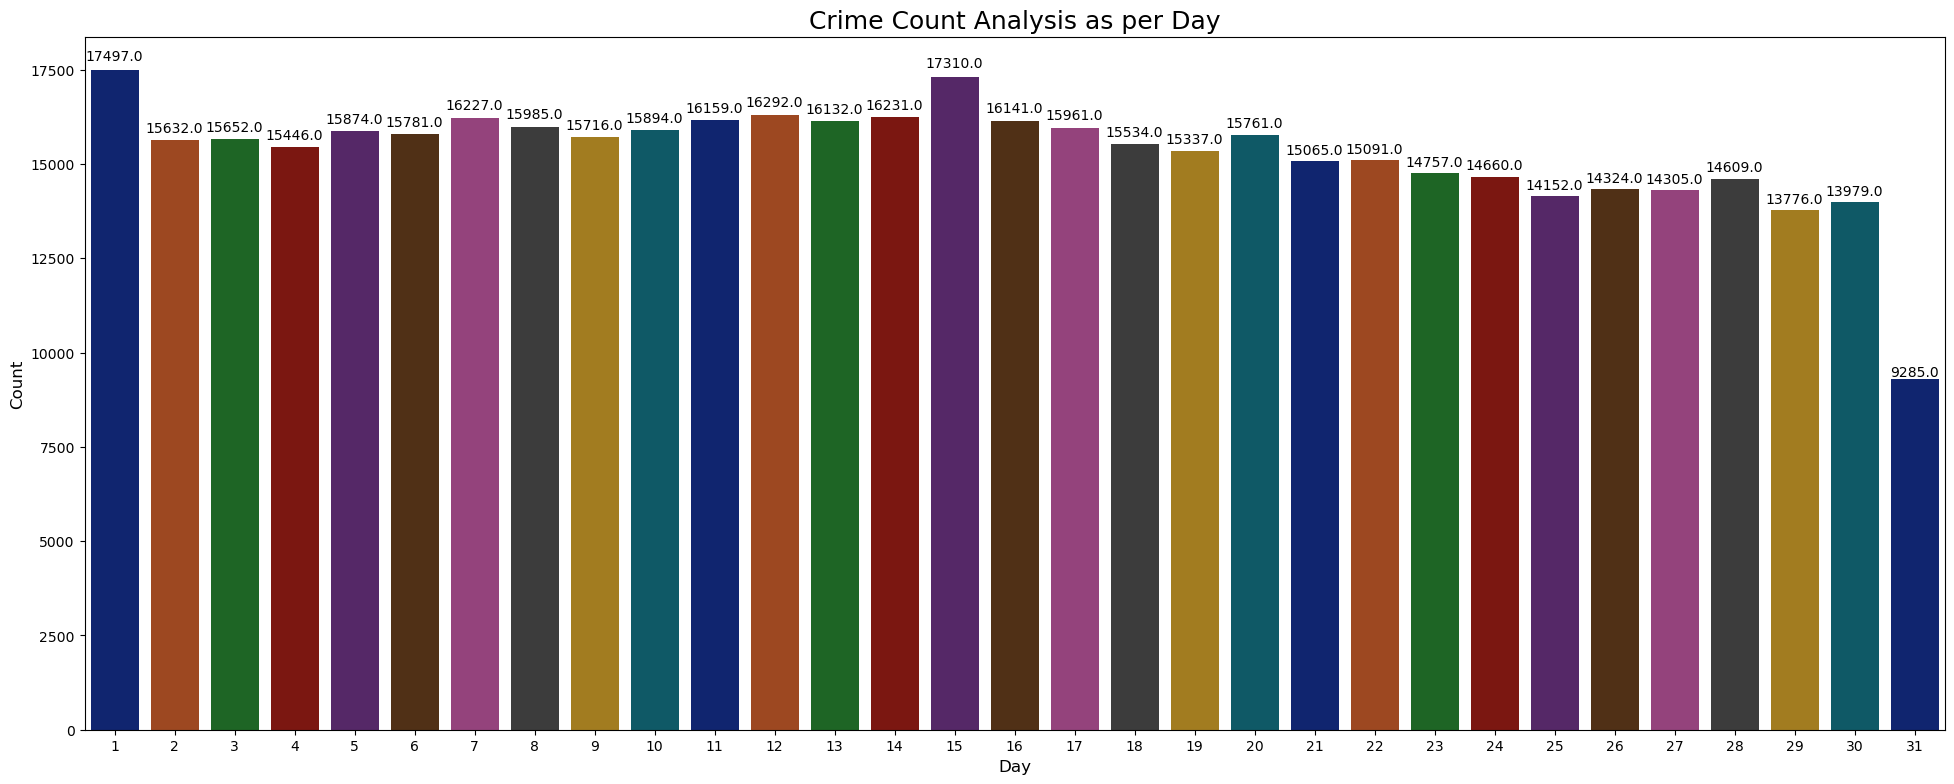

In [157]:
# Chart - 9 visualization code
plt.figure(figsize=(24, 9))
ax = sns.countplot(x='DAY', data=md, hue="DAY", palette="dark", legend=0)
plt.title('Crime Count Analysis as per Day', fontsize=18)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,height + 0.02 * height),
                ha='center', va='center',
                fontsize=10, color='black')
                
plt.grid(False)  
plt.show()

##### 1. Why did you pick the specific chart?

The above barplot gives a clear picture for the crime count for each day of month from 1-31.

##### 2. What is/are the insight(s) found from the chart?

1) The highest crime count is for the day 1 with the value of 17497.
2) The second highest crime count is for the day 15 with the value of 17310.
3) The lowest crime count is for the day 31 with the value of 9285.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive impact is that the least count of crime is for the day 31 which means criminals don't target last day of the month generally.
The negative imapct is that the highest and second highest crime count is for the day 1 and day 15 respectively which means criminals mostly doing crimes either at the starting of the month or at the middle of the month.

#### Chart - 10

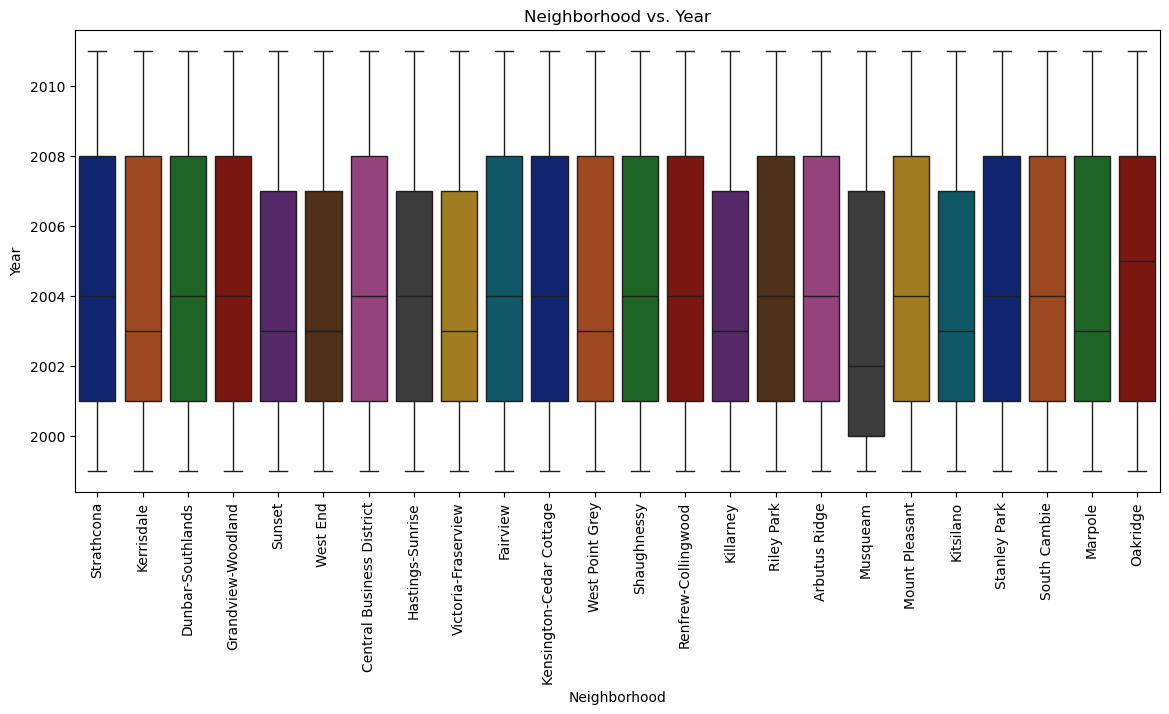

In [26]:
# Chart - 10 visualization code
plt.figure(figsize=(14, 6))
sns.boxplot(x="NEIGHBOURHOOD", y="YEAR", data=md, palette="dark", hue="NEIGHBOURHOOD",legend=0)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Year")
plt.title("Neighborhood vs. Year")
plt.show()

##### 1. Why did you pick the specific chart?

This helps us to compare neighbourhood and year with a range bar plot to compare easily.

#### Chart - 11

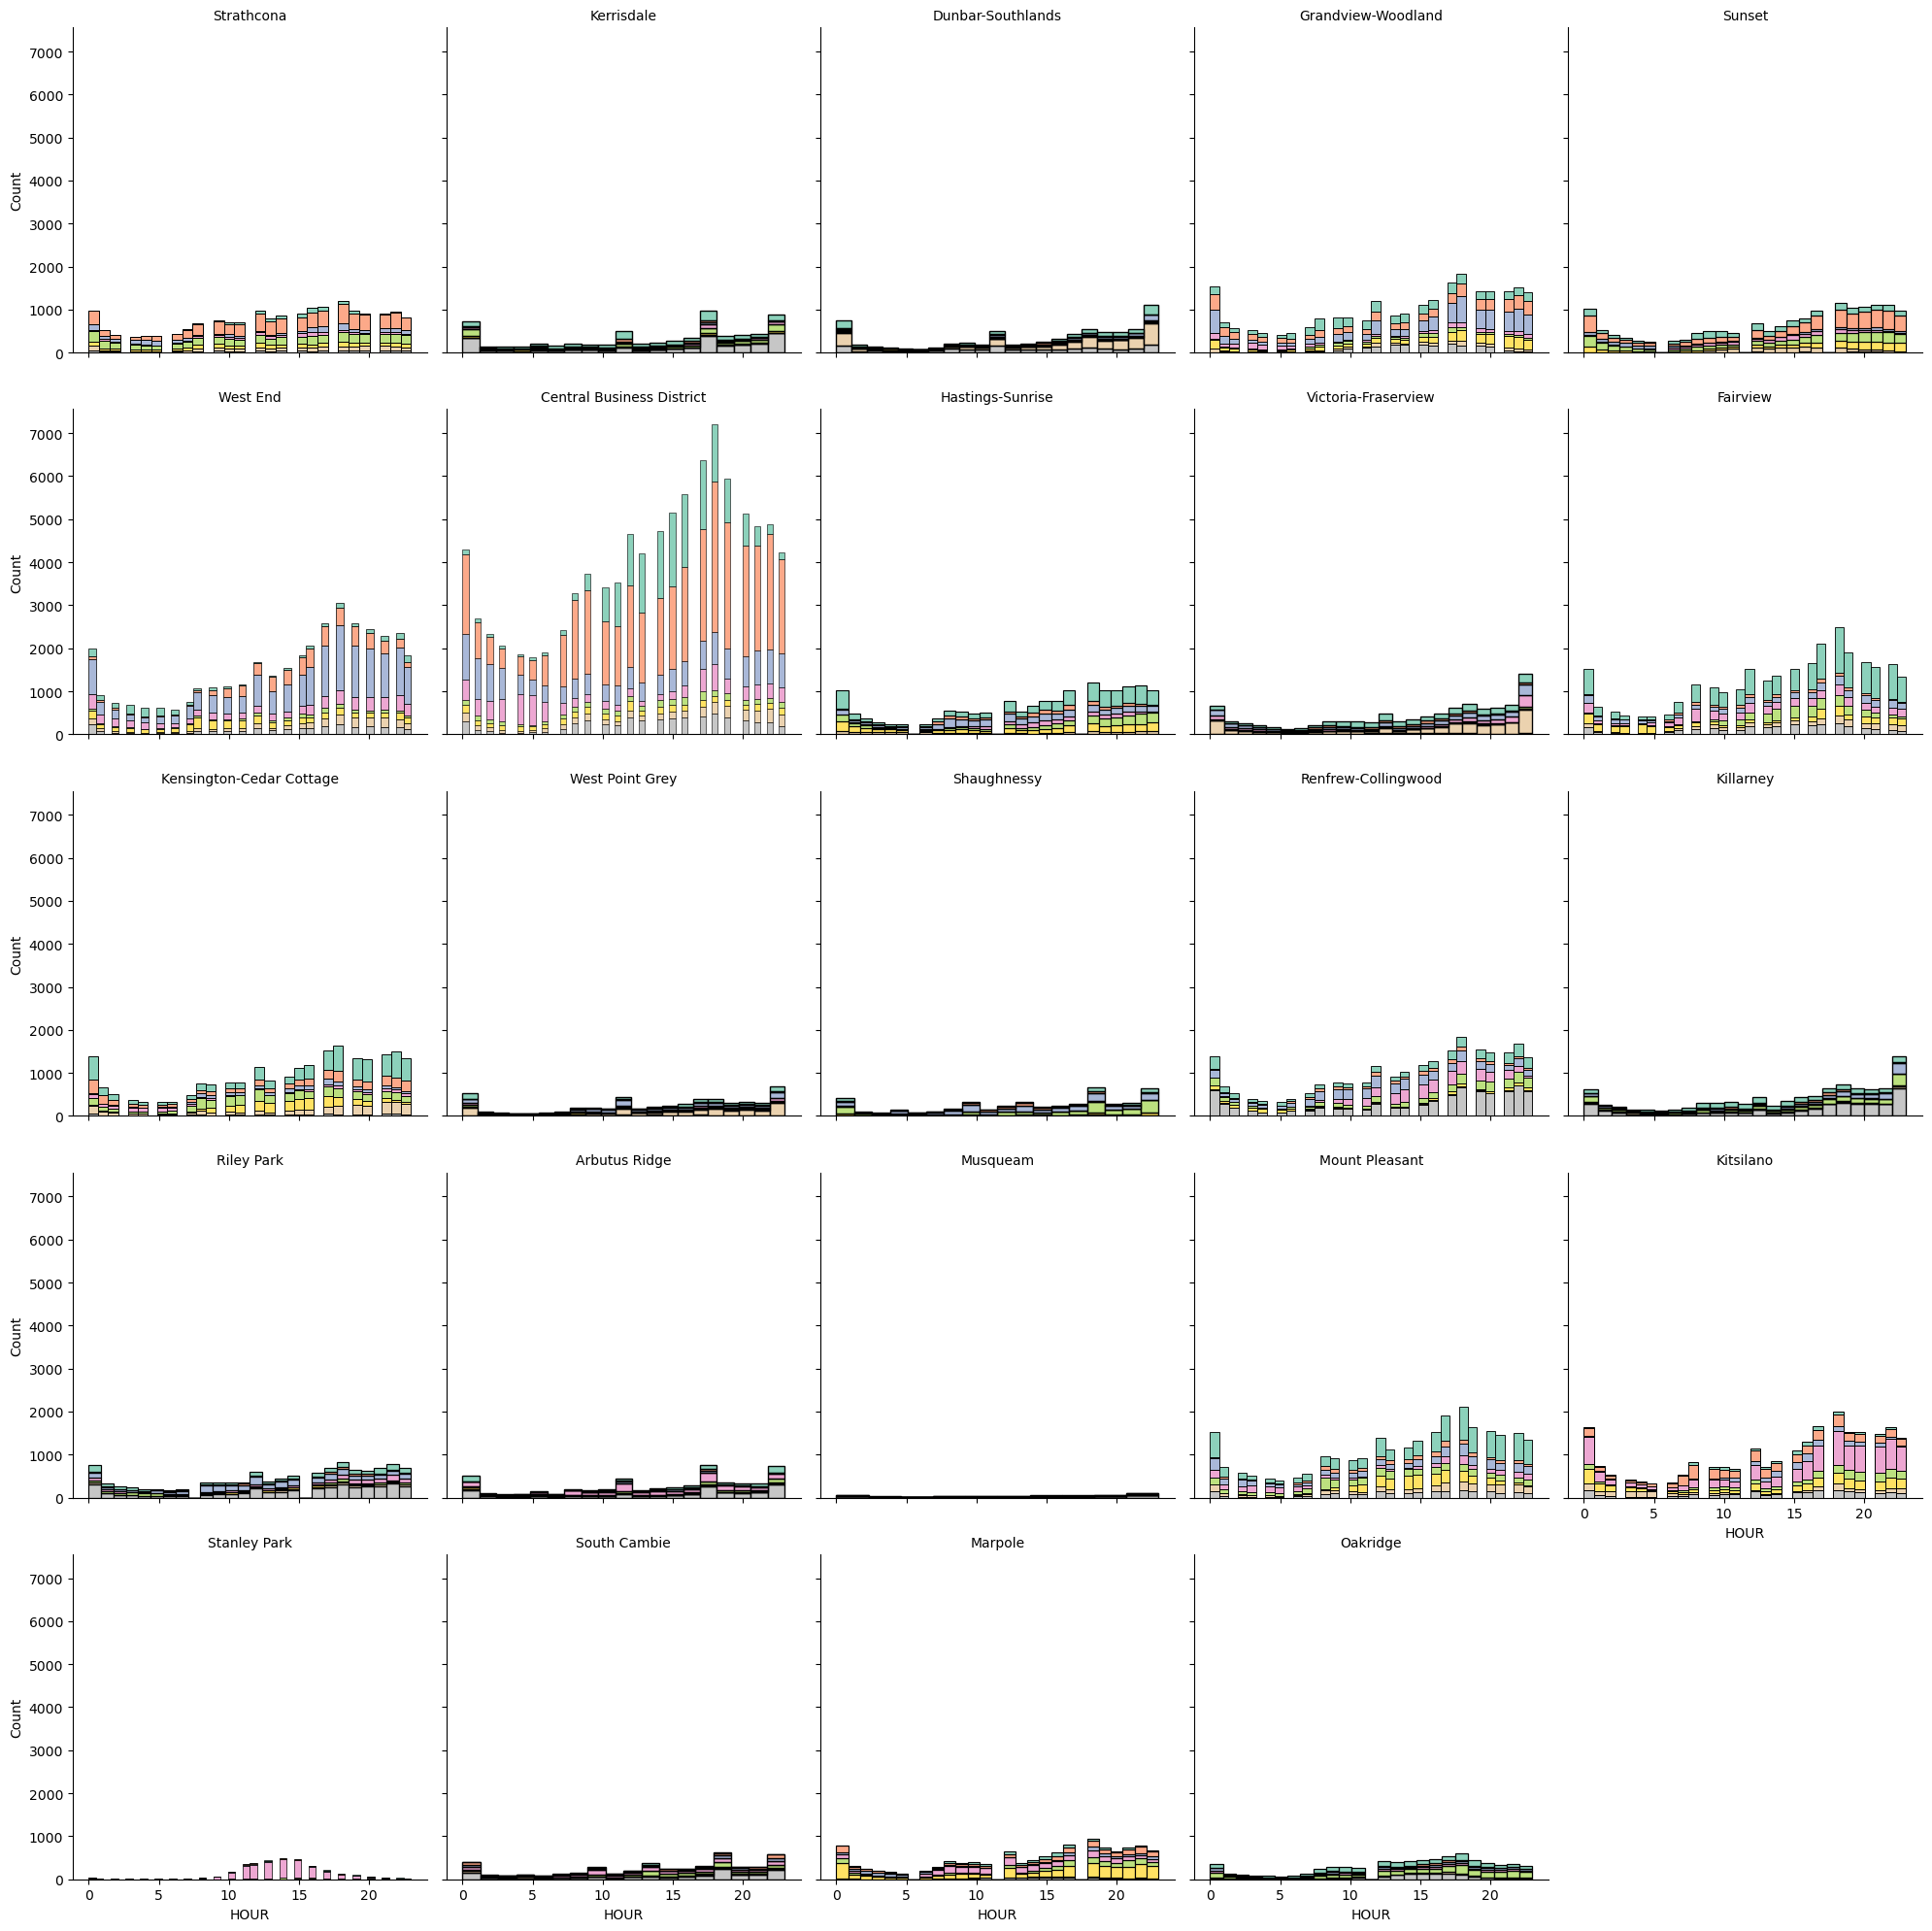

In [45]:
# Chart - 11 visualization code
g = sns.FacetGrid(md, col="NEIGHBOURHOOD", col_wrap=5, height=4)
g.map_dataframe(sns.histplot, x="HOUR", hue="TYPE", multiple="stack", palette="Set2")
g.set_titles(col_template="{col_name}")
plt.show()

##### 1. Why did you pick the specific chart?

This map chart gives us the clear picture to analyze the count for each neighbourhood for each year and all numerical columns with their count.

##### 2. What is/are the insight(s) found from the chart?

1) For year 1999 West End Neighbourhood has maximum no of crime count.
2) For year 2011 not available neighbourhood has maximum count followed by oakridge.
3) For year 1999 Kerrisdale Neighbourhood has least count.
4) For year 1999 second highest crime count is for both Fairview and central Business District Neighbourhood.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive business impact is that the least no of crime count is for kerrisdale neighbourhood for year 1999 which means this area is usually safer than others. The negative business impact is that the maximum crime count is for the west end neighbourhood for the year 1999 which makes the place suspicious. Other than this the second highest crime count for the year 1999 is for both fairview and central business district neighbourhood which makes them questionable for safety.

#### Chart - 12

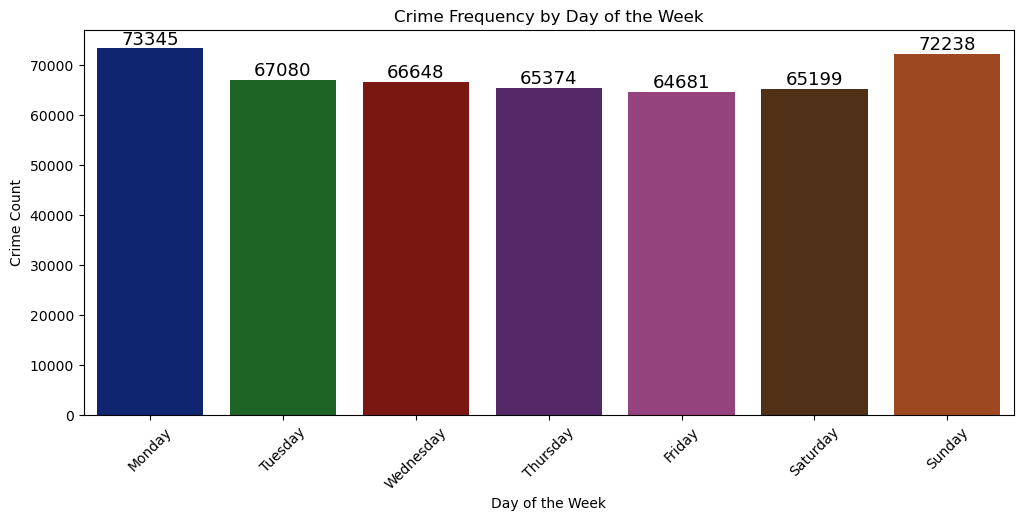

In [171]:
# Chart - 12 visualization code
# Create a DataFrame with day-wise counts
day_counts = md["Date"].dt.day_name().value_counts().reset_index()
day_counts.columns = ["Day", "Crime Count"]
# Sort days of the week in order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Plot
plt.figure(figsize=(12, 5))
jk = sns.barplot(data=day_counts, x="Day", y="Crime Count", order=order, hue="Day", palette="dark")

plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Crime Frequency by Day of the Week")
plt.xticks(rotation=45)
for p in jk.patches:
    height = p.get_height()
    jk.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height + 0.0001 * height),
                ha='center', va='bottom', fontsize=13, color='black')  

plt.show()

##### 1. Why did you pick the specific chart?

This helps us to find the count for day of week to analyse week.

##### 2. What is/are the insight(s) found from the chart?

1) The highest crime count is for Monday which has value of 73,345.
2) The second highest crime count is for Sunday which has value of 72,238.
3) The lowest crime count if for Friday which has value of 64,681.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive business imapact is that the crime count for Friday is least which makes that day most safe among other days of the week.
The negative business impact is that the crime count is maximum and second highest for Monday and Sunday which makes them the target days of the week for FBI to look after and ensure more safety for these days of the week to minimize the crime.

#### Chart - 13

<Figure size 1500x600 with 0 Axes>

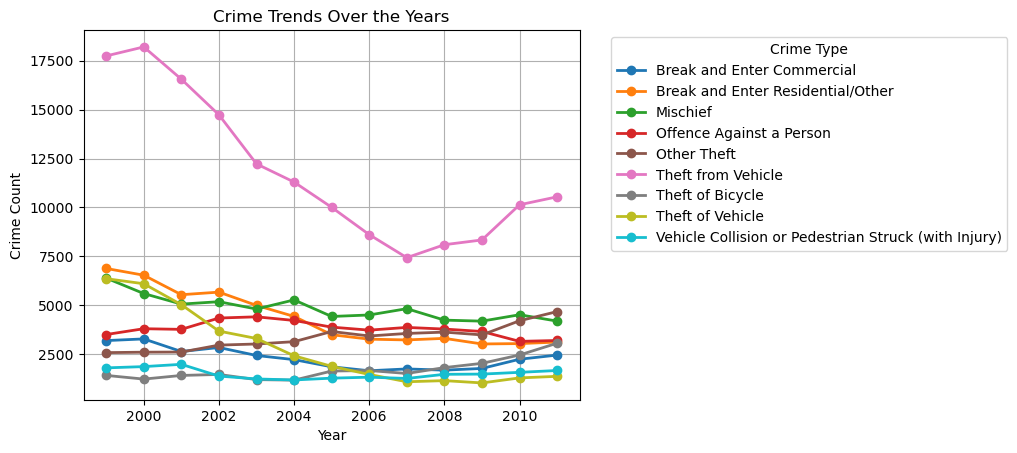

In [25]:
# Chart - 13 visualization code
plt.figure(figsize=(15, 6))
crime_trends = md.groupby(["YEAR", "TYPE"]).size().unstack()
crime_trends.plot(kind="line", colormap="tab10", linewidth=2, marker="o")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Crime Trends Over the Years")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This helps us to understand the crime trends for every crime type as per year with crime count.

##### 2. What is/are the insight(s) found from the chart?

1) Theft from vehicle has most exponential depreciation compared to other crime types with having maximum value of 18,000 in the year 2000 and lowest value of 7,500 in the year 2007.
2) Theft of bicycle has least crime count compared to other crime types with having maximum value of 2,500 in the year 2011 and lowest value of 1,000 in the year 2003.
3) Second highest count for the crime theft from vehicle is for the year 1999 with value 17,497.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive impact is that the year 2003 has lowest crime count for theft of bicycle,
The negative impact is that the year 2000 has highest crime count for theft from vehicle crime type and second highest for year 1999 for the same crime type.

#### Chart - 14 - Correlation Heatmap

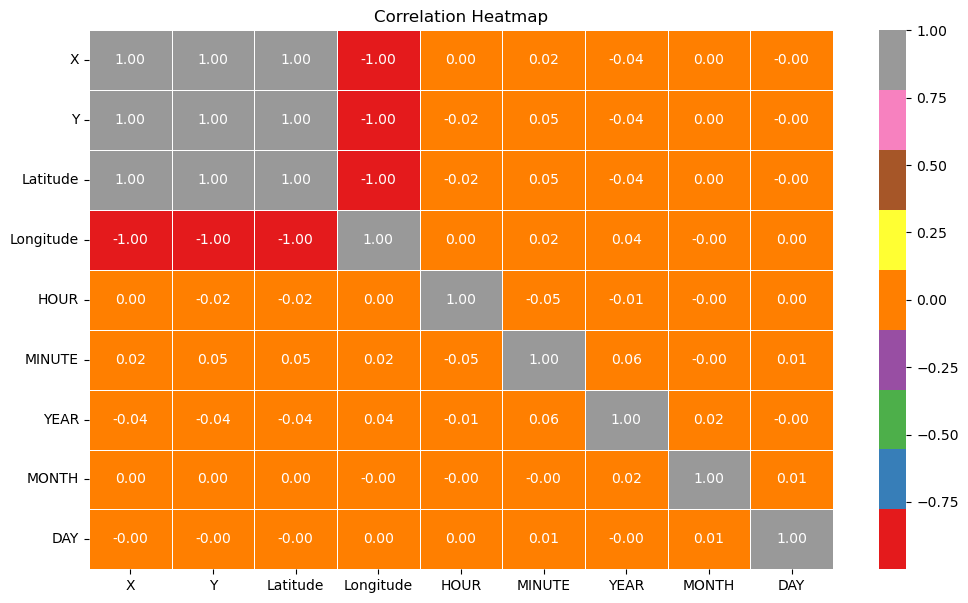

In [15]:
# Correlation Heatmap visualization code
numerical = md.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical.corr().fillna(0)  
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap="Set1", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap to analyse the correlation between numerical value type columns.

##### 2. What is/are the insight(s) found from the chart?

1) The strongest correlation is between X, Y and Latitude with correlation value of 1.
2) The lowest correlation is between X , Y and Longitude with correlation value of -1.

#### Chart - 15 - Pair Plot

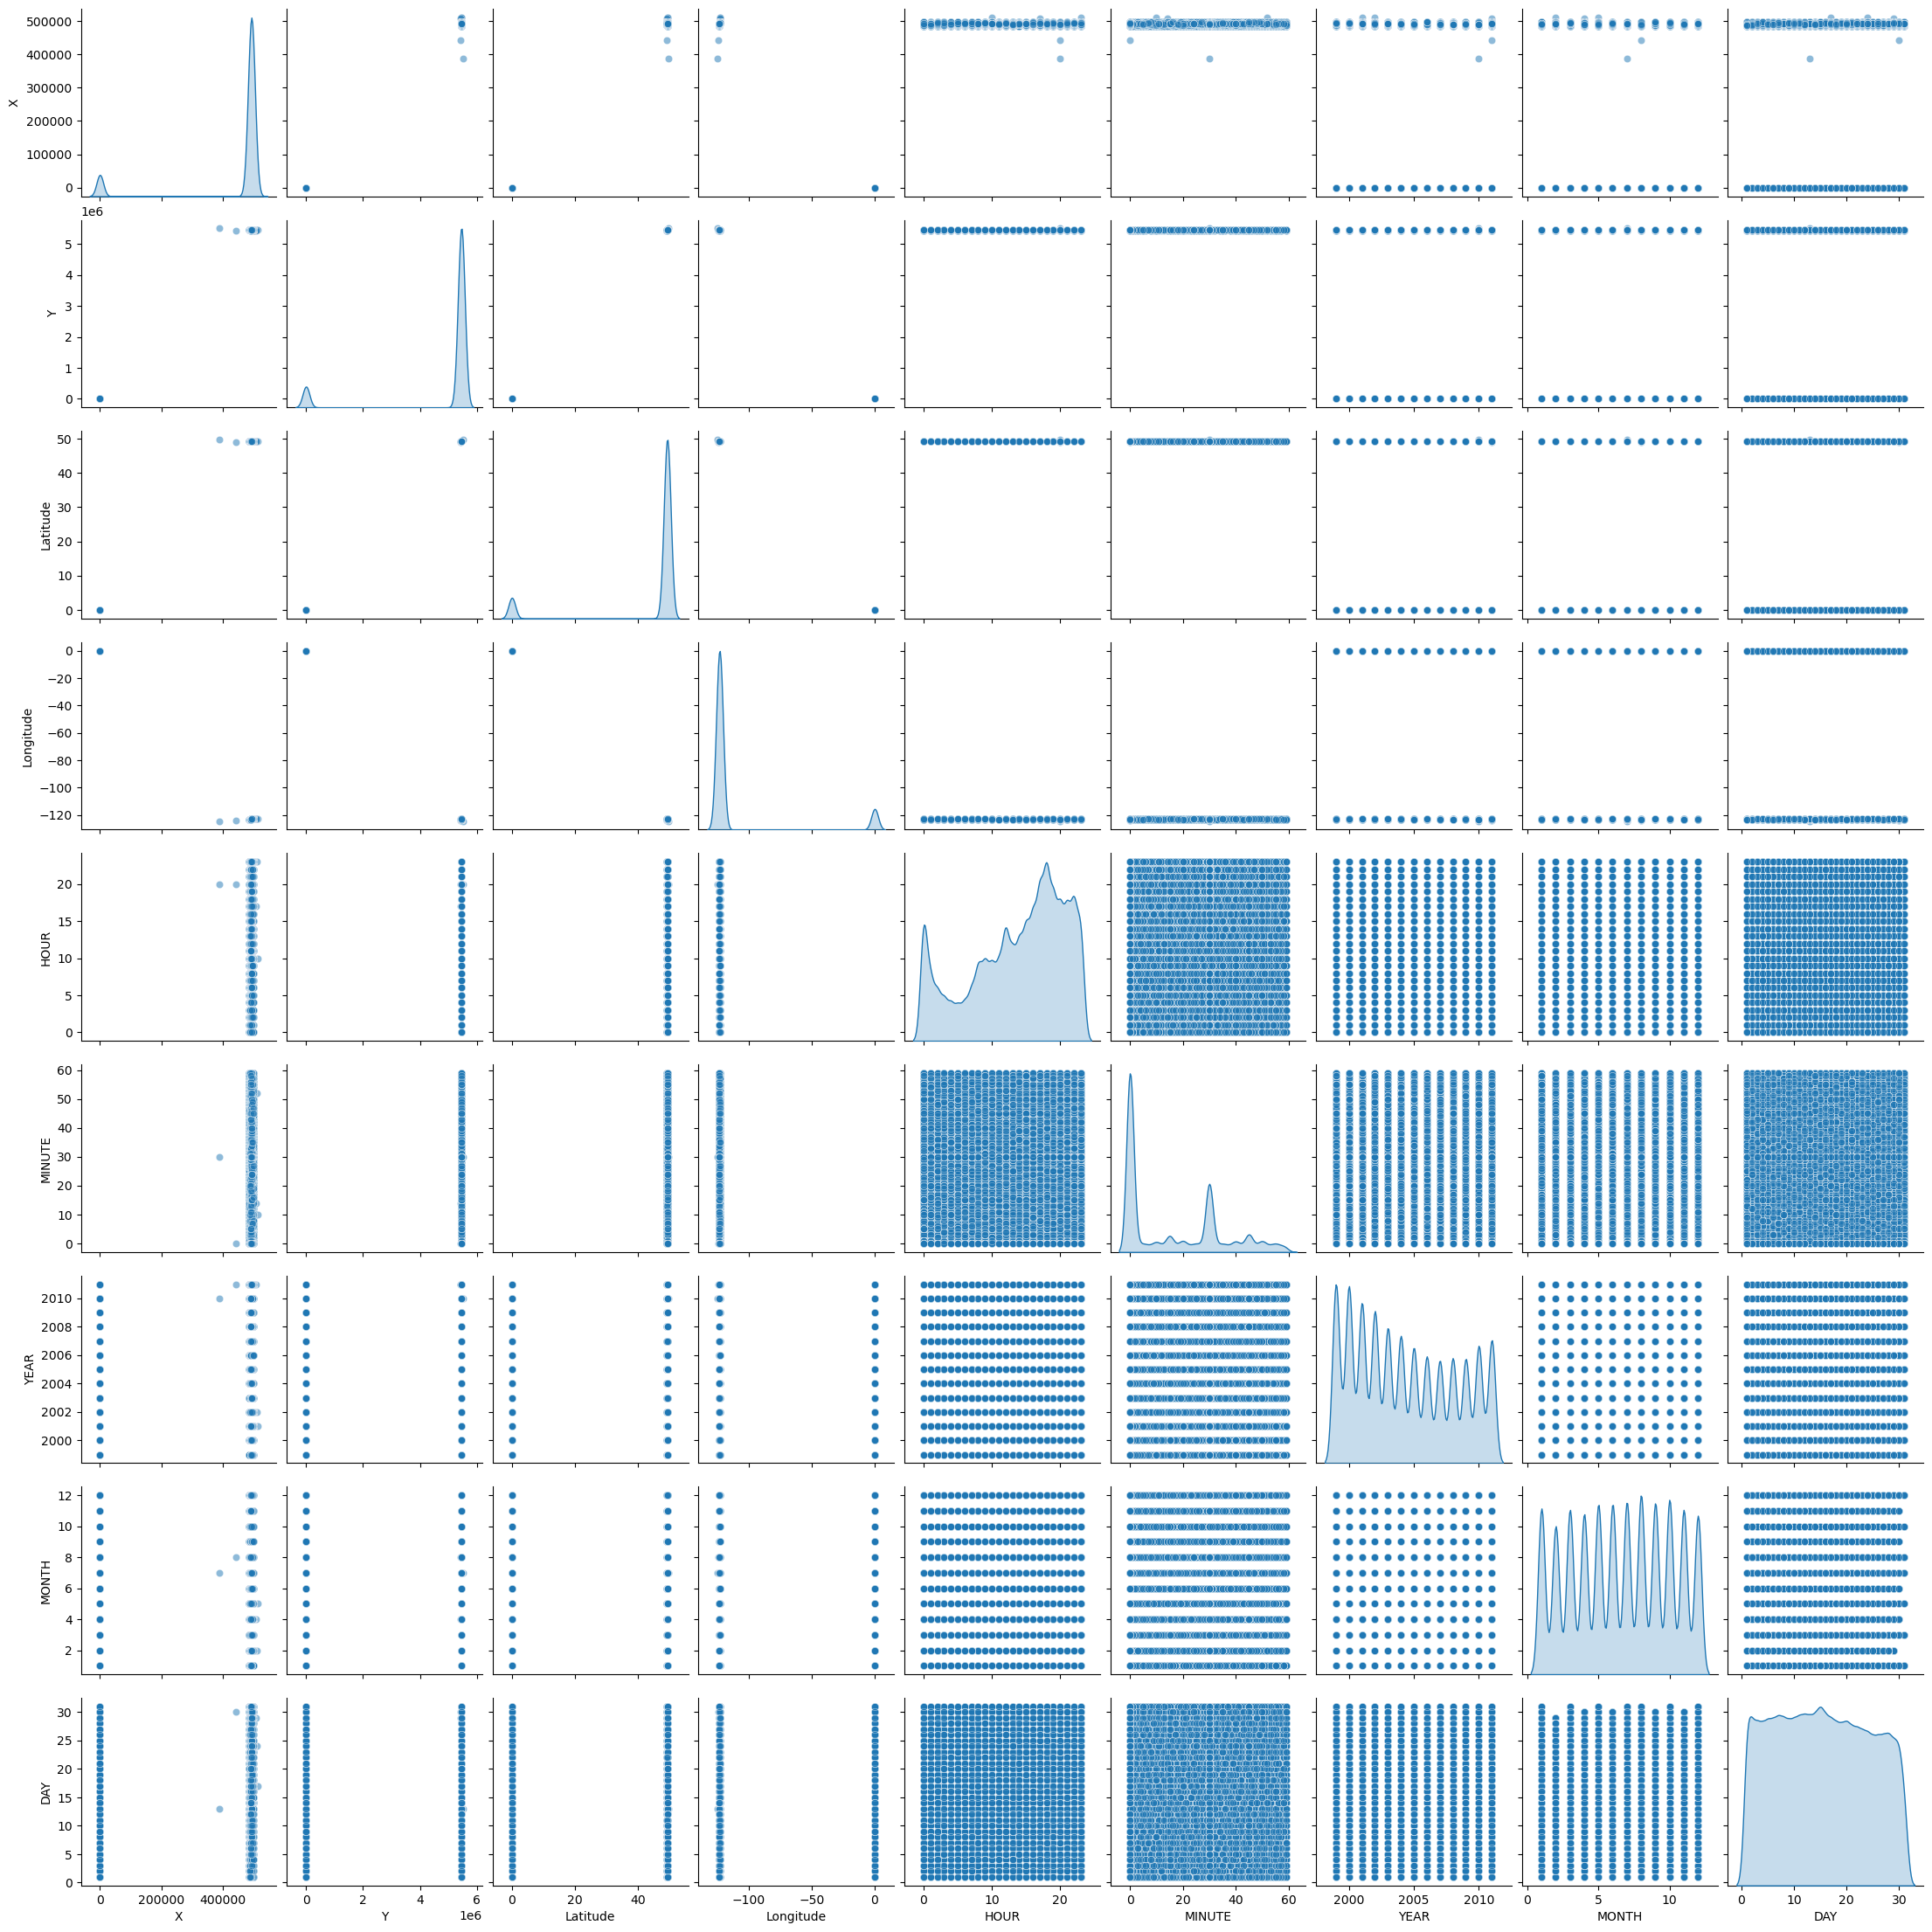

In [5]:
# Pair Plot visualization code
numerical = md.select_dtypes(include=['int64', 'float64'])
numerical = numerical.dropna(axis=1, thresh=len(numerical) * 0.8) 
sns.pairplot(numerical, diag_kind='kde', plot_kws={'alpha': 0.5})  
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot helps us to analyse numerical values against each other of our dataset.

##### 2. What is/are the insight(s) found from the chart?

1) For Day the HOUR column is present for every value which means at midnight the crime never happened when HOUR becomes 0.
2) For Day the Minute column is present for every value which means every minute from 0-60 is present in the dataset in some or other way.
3) For Day the columns X, Y, Latitude and Longitude is present only for values on x-axis 0 or maximum.

### POWER BI DashBoard 

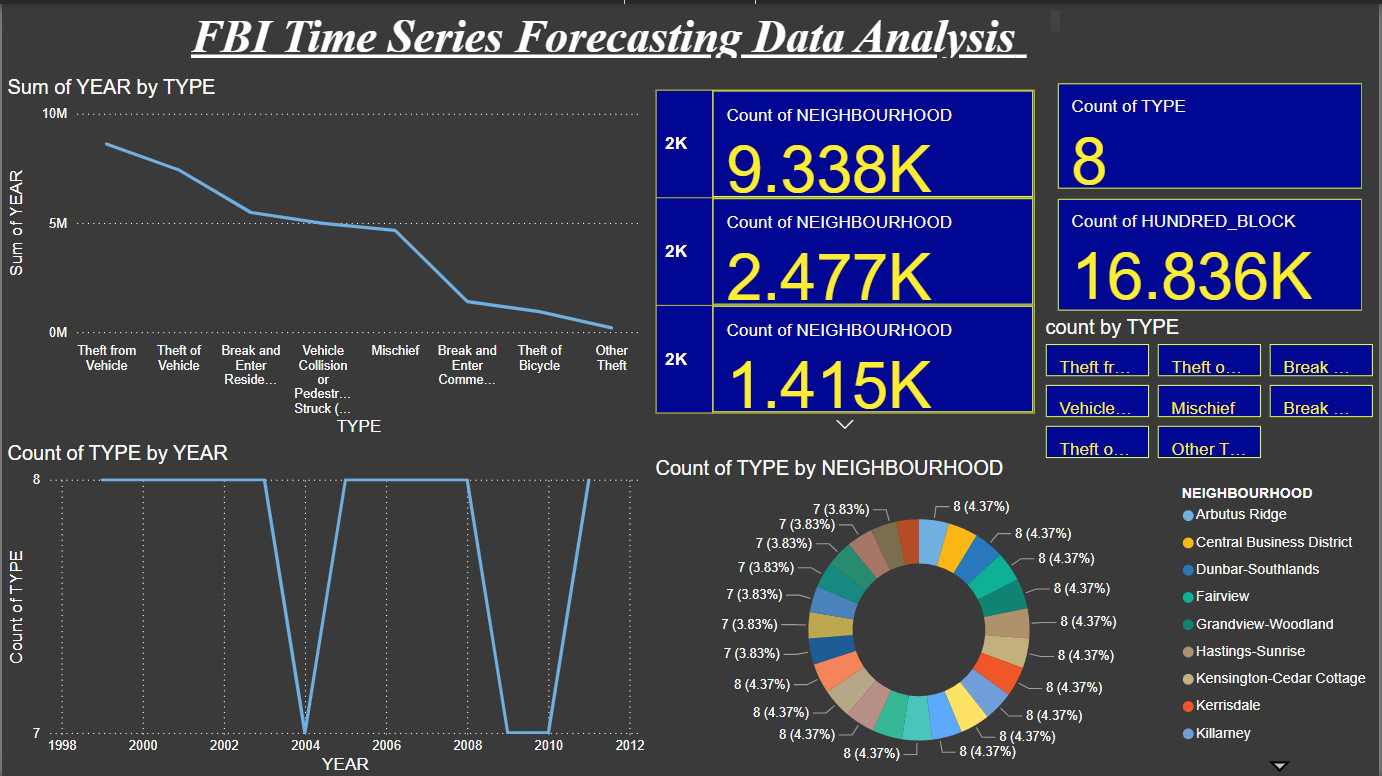

In [23]:
from PIL import Image
import IPython.display as display

image_path = "C:\\Users\\hp\\Desktop\\Exam Docs\\Labmentix Data analytics intern\\Week 7\\FBI_Power_Bi_AGH.jpg"  
# Change this to your actual image path
image = Image.open(image_path)

display.display(image)  # Show image in Jupyter

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The following are the suggestions which can be helpful to improve the crime rate and thus decrease or prevent its intensity in the near future:-

1) As per analysis the year 1999 has maximum count for crimes which led to make that year most critical one with value of 21098, to avoid this FBI can analyse what cause most no of crimes in that year and how we can prevent like installing more cctv's and alert systems to ensure safety.
2) Theft from vehicle crime type has maximum count compared to others which has value of 153,932 which means FBI needs to ensure safety of vehicle owners by pre-installing gps and 360 dashcams on cars at the time of manufacturing so as to record the data and prevent this from happeneing again and catch criminals in least time possible.
3) October month and Day 1 and 15 has maximum no of count for crimes which means FBI should ensure more safety in Day 1 and middle of the month for every month and specilly for october month as most crimes happened every year in october month which mekes it most unsafe month, FBI can increase surveillance for these days and month to ensure safety of public.
4) The second highest crime type is the mischief which has count of 63,233 and 13.3% percentage out of overall crimes, which means FBI should ensure safety of women by enabling women safety helplines and help booth lines to prevent and minimize these crimes to happen in near future.
5) The strongest correlation is between X, Y and Latitude with correlation value of 1, the lowest correlation is between X , Y and Longitude with correlation value of -1.
6) The highest crime count is for Monday which has value of 73,345 and the second highest crime count is for Sunday which has value of 72,238 which means on sunday and monday the FBI needs to increase safety measures so as to decrease crime rate.

# **Conclusion**

The following are the concluding points for the FBI time series forecasting EDA analysis:-

1) There are total of 90157 rows and 13 columns in the dataset.
2) There are 4 columns which are having some null values which are HUNDRED_BLOCK ,NEIGHBOURHOOD, HOUR and MINUTE which we then replaced with Not Available statment.
3) We removed 49361 duplicated rows to ensure fairness in data analysis while doing EDA on dataset.
4) For the year 1999 the count of crime is maximum and with desity 0.25, for the date which is having year 1999 has maximum desity more than 0.0005.
5) Lowest density is for year 2009 for both Date and Year with value less than 0.0001 and 0.05 respectively.
6) Maximum crime count is for theft from vehicle type with value 25008, second highest crime count is for break and enter residential/other type with value 23434.
7) Highest crime count is for year 1999 with value 21098.
8) Second Highest crime count is for year 2000 with value 13005.
9) Third Highest crime count is for year 2001 with value 9822.
10) Lowest crime count is for year 2009 with value 3396.
11) Second Lowest crime count is for year 2010 with value 3600.
12) Third Lowest crime count is for year 2011 with value 3649.
13) Highest crime count is for the crime type theft from vehicle which is 153,932.
14) Lowest crime count is for the crime type vehicle collision or pedestrian struck with value 19,531.
15) Second Highest crime count is for the mischief crime type with vale 63,233.
16) The strongest correlation is between X, Y and Latitude with correlation value of 1.
17) The lowest correlation is between X , Y and Longitude with correlation value of -1.

The above are the conclusion which describes the EDA for the FBI time series forecasting dataset which shows highest, lowest and correlation between numerical values.